In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Question 3.1

### Preprocessing

In [2]:
abc_limited = pd.read_csv("data.csv")

In [3]:
abc_limited.shape

(10000, 83)

In [4]:
abc_limited.head()

,Unnamed: 0,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
0,dmp923122274,0,0,2,0,0,3,6,0,0,...,0,0,0,4,0,0,1,0,1,0
1,dmp458034174,0,3,0,0,0,0,1,0,0,...,0,0,0,12,0,2,2,12,0,0
2,dmp364043571,0,2,0,0,0,0,0,0,2,...,0,0,0,11,0,0,0,0,0,0
3,dmp461339655,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,22,0,0
4,dmp549691332,0,0,0,0,0,5,7,0,0,...,0,0,1,0,0,0,1,0,0,0


In [5]:
abc_limited.describe()

,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,Digg,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.42250,0.78130,0.568100,2.823700,0.0,1.950400,2.142100,0.000200,0.393100,1.012700,...,0.41190,0.040200,0.293600,2.176900,0.459500,0.602200,0.380800,6.040600,0.206600,0.123400
std,1.01405,1.48899,1.197709,5.571438,0.0,2.937619,3.293993,0.014141,0.811319,2.266021,...,1.00436,0.196438,0.612402,3.691879,0.982169,1.194696,0.755413,7.892679,0.588856,0.328912
min,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,1.00000,0.000000,0.000000,0.0,4.000000,4.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
max,6.00000,8.00000,7.000000,28.000000,0.0,15.000000,16.000000,1.000000,4.000000,13.000000,...,7.00000,1.000000,3.000000,19.000000,5.000000,7.000000,4.000000,36.000000,4.000000,1.000000


### Removing non-numeric values

In [6]:
non_numeric = []
numeric = ["int64", "float64", "complex128", "uint64", "bool"]

for i in range(83-1):
    if abc_limited.iloc[:, i].dtype not in numeric:
        non_numeric.append(abc_limited.iloc[:, i].name)

In [7]:
print(non_numeric)

['Unnamed: 0', 'Diigo']


In [8]:
abc_limited[non_numeric[0]].value_counts()

dmp923122274    1
dmp863902814    1
dmp911196352    1
dmp490597653    1
dmp646923345    1
               ..
dmp537006575    1
dmp268755107    1
dmp211675389    1
dmp383759020    1
dmp521609268    1
Name: Unnamed: 0, Length: 10000, dtype: int64

In [9]:
abc_limited[non_numeric[0]]

0       dmp923122274
1       dmp458034174
2       dmp364043571
3       dmp461339655
4       dmp549691332
            ...     
9995    dmp910305497
9996    dmp877506661
9997    dmp356452644
9998    dmp689019375
9999    dmp521609268
Name: Unnamed: 0, Length: 10000, dtype: object

In [10]:
abc_limited = abc_limited.drop(non_numeric[0], axis=1)
abc_limited.head()

,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,Digg,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
0,0,0,2,0,0,3,6,0,0,0,...,0,0,0,4,0,0,1,0,1,0
1,0,3,0,0,0,0,1,0,0,0,...,0,0,0,12,0,2,2,12,0,0
2,0,2,0,0,0,0,0,0,2,0,...,0,0,0,11,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,22,0,0
4,0,0,0,0,0,5,7,0,0,5,...,0,0,1,0,0,0,1,0,0,0


In [11]:
abc_limited[non_numeric[1]]

0                            0
1                            0
2                            0
3       Error: value not found
4                            0
                 ...          
9995                         0
9996                         0
9997                         0
9998                         0
9999                         0
Name: Diigo, Length: 10000, dtype: object

In [12]:
abc_limited[non_numeric[1]].value_counts()

0                         8842
Error: value not found     642
1                          332
2                          183
3                            1
Name: Diigo, dtype: int64

In [13]:
# replace certain values with NaN
abc_limited.replace([non_numeric[1], 'Error: value not found'], np.nan, inplace=True)

In [14]:
abc_limited.head()

,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,Digg,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
0,0,0,2,0,0,3,6,0,0,0,...,0,0,0,4,0,0,1,0,1,0
1,0,3,0,0,0,0,1,0,0,0,...,0,0,0,12,0,2,2,12,0,0
2,0,2,0,0,0,0,0,0,2,0,...,0,0,0,11,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,22,0,0
4,0,0,0,0,0,5,7,0,0,5,...,0,0,1,0,0,0,1,0,0,0


### Removing outliers

In [15]:
def outlier_removal(df):
    numeric_cols = df.select_dtypes(include='number').columns
    for col in numeric_cols:
        q1 = df[col].quantile(0.03)
        q3 = df[col].quantile(0.97)
        IQR = q3 - q1

        # defining lower and upper limits
        lower_lim = q1 - 1.5 * IQR
        upper_lim = q3 + 1.5 * IQR

        # defining outliers
        outliers_low = (df[col] < lower_lim)
        outliers_up = (df[col] > upper_lim)

        # dropping outliers
        df = df[~(outliers_low | outliers_up)]
    
    return df


In [16]:
abc_limited = abc_limited[~(abc_limited['Click'] < 0)| (abc_limited['Click'] >= 1000)]

In [17]:
abc_limited = outlier_removal(abc_limited)

In [18]:
abc_limited = abc_limited.dropna()

In [20]:
abc_limited.reset_index()

,index,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
0,0,0,0,2,0,0,3,6,0,0,...,0,0,0,4,0,0,1,0,1,0
1,1,0,3,0,0,0,0,1,0,0,...,0,0,0,12,0,2,2,12,0,0
2,2,0,2,0,0,0,0,0,0,2,...,0,0,0,11,0,0,0,0,0,0
3,4,0,0,0,0,0,5,7,0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,0,0,0,16,0,0,6,0,0,...,0,0,0,0,0,0,0,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8595,9995,0,0,0,20,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8596,9996,0,0,2,0,0,2,0,0,1,...,0,0,1,0,3,0,2,0,0,0
8597,9997,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2,0,0
8598,9998,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Separate the target column
target_col = 'Click'
X = abc_limited.drop(columns=[target_col])
y = abc_limited[target_col]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (6880, 81)
Shape of X_test: (1720, 81)
Shape of y_train: (6880,)
Shape of y_test: (1720,)


***
## <center> "Random forrest"
***

In [22]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [23]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1716
           1       0.02      1.00      0.04         4

    accuracy                           0.89      1720
   macro avg       0.51      0.95      0.49      1720
weighted avg       1.00      0.89      0.94      1720



Text(110.44999999999997, 0.5, 'predicted label')

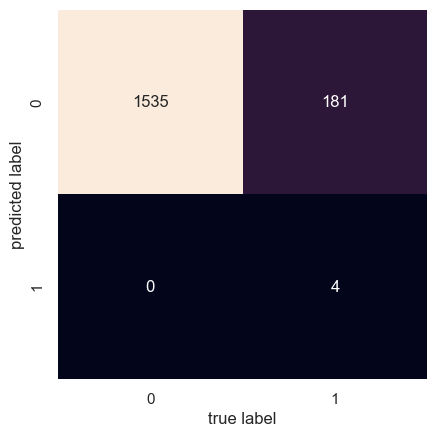

In [24]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [25]:
#cross validation
scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
print("Mean of crossvalidation score: \t" + str(tree_rmse_scores.mean()))

Mean of crossvalidation score: 	0.34459462955103676


***
## <center> "SVM"
***

In [26]:
clf = SVC(kernel='linear', class_weight='balanced')
clf.fit(X_test, y_test)

SVC(class_weight='balanced', kernel='linear')

In [27]:
y_fit = clf.predict(X_test)

In [28]:
print(classification_report(y_test, y_fit))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1535
           1       0.85      1.00      0.92       185

    accuracy                           0.98      1720
   macro avg       0.92      0.99      0.95      1720
weighted avg       0.98      0.98      0.98      1720



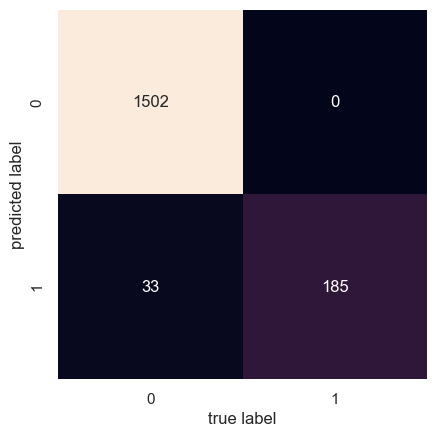

In [29]:
#[TODO] Also display the confusion matrix between these classes
mat = confusion_matrix(y_test, y_fit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [30]:
#cross validation
scores = cross_val_score(clf, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-scores)
print("Mean of crossvalidation score: \t" + str(svm_rmse_scores.mean()))

Mean of crossvalidation score: 	0.19190362955602663


# Question 3.2
Select the 5 most influential features

Before:
- Exclude 5th column "Buddymedia" as it only includes 0s and results in non-valid score later on

In [31]:
data = pd.read_csv("data.csv")
data.set_index("Unnamed: 0", inplace=True)
data["Diigo"].replace("Error: value not found", np.NaN, inplace=True)
data["Diigo"] = data["Diigo"].astype('Int64')
data["Diigo"].value_counts()
out = []
for i in data.columns[1:-1]:
   if not data[~data[i].between(0, 1000)].empty: # go through dataframe per column and check if value between 0 an 100 (check if resulting df is empty)
        out.append((i, data[i][~data[i].between(0, 1000)])) # if not empy add the dataframe and columnnae as a tuple to the output list

In [32]:
y = data["Click"]
X = data.drop(["Click","Buddymedia"], axis=1)
columns = X.columns

1. Imputing missing values in the features (X)
- In columns: "Diigo" and "Newsvine"

In [33]:
print(pd.DataFrame(X, columns=columns).info()) # before
imp = SimpleImputer(missing_values=np.NaN, strategy='mean') # imputing nan values using the mean
X = imp.fit_transform(X)
print(pd.DataFrame(X, columns=columns).info()) # after

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, dmp923122274 to dmp521609268
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Addthis        10000 non-null  int64
 1   Bebo           10000 non-null  int64
 2   Blogcatalog    10000 non-null  int64
 3   Blogger        10000 non-null  int64
 4   Cnet           10000 non-null  int64
 5   Conduit        10000 non-null  int64
 6   Customerlobby  10000 non-null  int64
 7   Delicious      10000 non-null  int64
 8   Digg           10000 non-null  int64
 9   Diigo          9358 non-null   Int64
 10  Docs           10000 non-null  int64
 11  Docstoc        10000 non-null  int64
 12  Download       10000 non-null  int64
 13  Dropbox        10000 non-null  int64
 14  Drupal         10000 non-null  int64
 15  Epinions       10000 non-null  int64
 16  Evernote       10000 non-null  int64
 17  Facebook       10000 non-null  int64
 18  Faves          10000 non-null  in

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0
1,2.0,0.0,0.0,15.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,2.0,0.0,0.0,13.0,0.0
2,0.0,2.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,2.0,1.0,0.0,25.0,0.0
3,0.0,2.0,4.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0
7996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,9.0,0.0
7997,0.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0
7998,0.0,0.0,0.0,0.0,6.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,0.0,3.0,0.0,0.0,0.0


In [35]:
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X_train, y_train)
print(X_train.shape)
print(X_new.shape)
pd.DataFrame(X_new)

(8000, 80)
(8000, 5)


,0,1,2,3,4
0,7.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,8.0,0.0
2,7.0,0.0,0.0,9.0,1.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
7995,4.0,1.0,0.0,4.0,0.0
7996,5.0,1.0,0.0,7.0,0.0
7997,0.0,0.0,1.0,12.0,0.0
7998,0.0,0.0,0.0,12.0,3.0


Select 5 highest scores
- "get_support" returns a list with False and True values corresponding to the columns which are to be included

In [36]:
print(selector.scores_[selector.get_support()])
print(columns[selector.get_support()])
# same as this: scores = selector.scores_
# print(np.sort(scores)[::-1][:5])

[232.66629528 260.33211849 274.38541874 226.00130489 230.13034409]
Index(['Livejournal', 'Thisnext', 'Typepad', 'Wordpress', 'Yelp'], dtype='object')


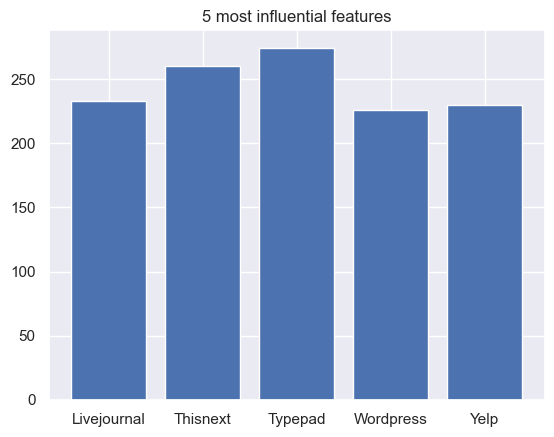

In [37]:
plt.bar(columns[selector.get_support()], selector.scores_[selector.get_support()])
plt.title("5 most influential features")
plt.show()

       feature     score
2      Typepad  1.000000
1     Thisnext  0.948783
0  Livejournal  0.847954
4         Yelp  0.838712
3    Wordpress  0.823664


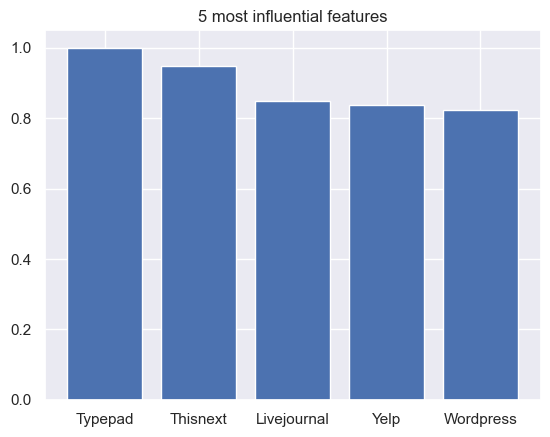

The number of features was reduced from 80 to 5.


In [51]:
def plot_five_features(X, y, col):
    selector = SelectKBest(f_classif, k=5)
    selector.fit_transform(X, y)
    scores = selector.scores_[selector.get_support()]/selector.scores_[selector.get_support()].max()

    b = pd.DataFrame({"feature": col[selector.get_support()], "score": scores}).sort_values("score", ascending=False)
    print(b)
    
    plt.bar(b["feature"], b["score"])
    plt.title("5 most influential features")
    plt.show()
    print(f"The number of features was reduced from {X.shape[-1]} to {X_new.shape[-1]}.")

plot_five_features(X_train, y_train, columns)

# Question 3.3 + 3.4

In [68]:
column_sums = data.sum()
print("Typepad: \t" + str(column_sums["Typepad"]/1000) + " DKK")
print("Thisnext: \t" + str(column_sums["Thisnext"]/1000)+ " DKK")
print("Livejournal: \t" + str(column_sums["Livejournal"]/1000)+ " DKK")
print("Yelp: \t \t" + str(column_sums["Yelp"]/1000)+ " DKK")
print("Wordpress: \t" + str(column_sums["Wordpress"]/1000)+ " DKK")

Typepad: 	9.558 DKK
Thisnext: 	2.019 DKK
Livejournal: 	16.015 DKK
Yelp: 	 	6.022 DKK
Wordpress: 	21.769 DKK


It is shown that the least effective of the five is the most expensive one, which is why that one shouldn't be chosen as a main channel. The second most valuable however, "Thisnext" costs the least amount of money but is the second most valuable feature, thus it should definitely be picked. The most valubale feature is the third most expensive one but still acceptable especially seeing that it relatively attracts the most clicks. 